# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json   #Provide rights for your colab to communicate with kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists



# **About Dataset :**

**Context**

This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

**Content**

Time Period: 2001 - 2012 ,Granularity: Yearly

Location: States and U.T's of India

Parameters:
a) Suicide causes
b) Education status
c) By means adopted
d) Professional profile
e) Social status

In [ ]:
! kaggle datasets download -d rajanand/suicides-in-india #downloading the dataset

Dataset URL: https://www.kaggle.com/datasets/rajanand/suicides-in-india
License(s): CC-BY-SA-4.0
 80% 1.00M/1.25M [00:00<00:00, 1.98MB/s]
100% 1.25M/1.25M [00:00<00:00, 2.37MB/s]


In [ ]:
! unzip /content/suicides-in-india.zip  #unzipping the dataset

Archive:  /content/suicides-in-india.zip
  inflating: Suicides in India 2001-2012.csv  


In [ ]:
df = pd.read_csv("/content/Suicides in India 2001-2012.csv")  #reading the csv file using pandas

In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


# Cleaning and Transforming the data.

In [ ]:
df.duplicated().sum()  #checking duplicates in the data

0

Contents in the Columns :

In [ ]:
#getting the insight of the columns
for i in df:
  print(i,":   ",df[i].unique())

State :    ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
Year :    [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]
Type_code :    ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
Type :    ['Illness (Aids/STD)' 'Bankruptcy or Sudden change in Economic'
 'Cancellation/Non-Settlement of Marriage'
 'Physical Abuse (Rape/Incest Etc.)' 'Dowry Dispute' 'Family Problems'
 'Ideological Causes/Hero Worshipping' 'Other Prolonged Illness'
 'Property Dispute' 'Fall in Social Reputation' 'Illegitimate

In [ ]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [ ]:
df.groupby(['Age_group'])['Total'].sum()

Age_group
0-100+    8735586
0-14        98410
15-29     1534037
30-44     1471599
45-59      885177
60+        346925
Name: Total, dtype: int64

Cleaning the data

In [ ]:
#Removing the confusing data
# the Age_group of 0-100+ far exceeds the total sum of the rest
dfs = df.loc[df['Age_group']!= '0-100+']

Transforming the names of the **age_group** to different **Categories**

In [ ]:
# Define the mapping of age groups to categories
def map_age_group(age_group):
    if age_group in ['0-14']:
        return 'Child'
    elif age_group in ['15-29']:
        return 'Teen'
    elif age_group in ['30-44']:
        return 'Adult'
    elif age_group in ['45-59']:
        return 'Middle-aged'
    elif age_group in ['60+']:
        return 'Senior'
    else:
        return 'Unknown'

# Apply the mapping function to the Age_group column
dfs['Age_category'] = dfs['Age_group'].apply(map_age_group)

<ipython-input-7-b5d51c63c0da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Age_category'] = dfs['Age_group'].apply(map_age_group)


In [ ]:
dfs.head()

,State,Year,Type_code,Type,Gender,Age_group,Total,Age_category
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0,Child
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0,Child
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0,Child
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0,Child
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0,Child


In [ ]:
dfs.drop('Age_group', axis=1, inplace=True)

<ipython-input-9-9d7cb34c3922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.drop('Age_group', axis=1, inplace=True)


In [ ]:
dfs.head(2)

,State,Year,Type_code,Type,Gender,Total,Age_category
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0,Child
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0,Child


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225663 entries, 0 to 237508
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   State         225663 non-null  object
 1   Year          225663 non-null  int64 
 2   Type_code     225663 non-null  object
 3   Type          225663 non-null  object
 4   Gender        225663 non-null  object
 5   Total         225663 non-null  int64 
 6   Age_category  225663 non-null  object
dtypes: int64(2), object(5)
memory usage: 13.8+ MB


# Analysing the data

In [ ]:
byAge=dfs.groupby(['Age_category'])['Total'].sum()
byAge.keys()

Index(['Adult', 'Child', 'Middle-aged', 'Senior', 'Teen'], dtype='object', name='Age_category')

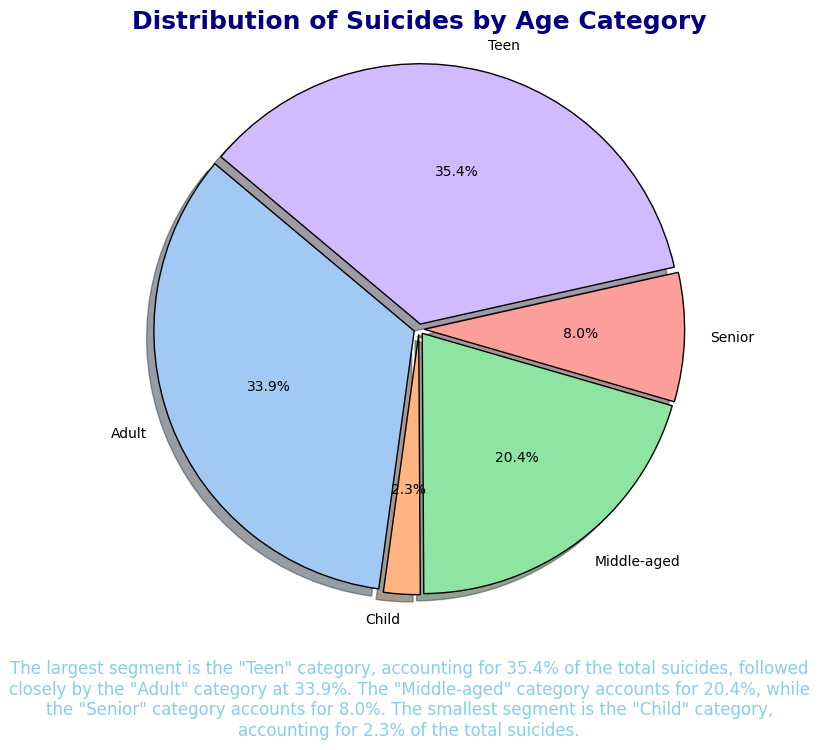

In [ ]:
# Define custom colors for the pie chart
colors = sns.color_palette('pastel')

# Plotting the pie chart
plt.figure(figsize=(8, 8))
explode = (0.02, 0.02, 0.02, 0.02, 0.02)
plt.pie(byAge,
        labels=byAge.keys(),
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Suicides by Age Category', fontsize=18, color='navy', fontweight='bold')
plt.axis('equal')
# Adding the descriptive text below the chart
description = (
    'The largest segment is the "Teen" category, accounting for 35.4% of the total suicides, '
    'followed closely by the "Adult" category at 33.9%. The "Middle-aged" category accounts for 20.4%, '
    'while the "Senior" category accounts for 8.0%. The smallest segment is the "Child" category, accounting for 2.3% of the total suicides.'
)

plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=12, color='skyblue')
# Adjusting layout to create more space between the plot and the text
plt.subplots_adjust(bottom=0.15)
# Display the pie chart
plt.show()

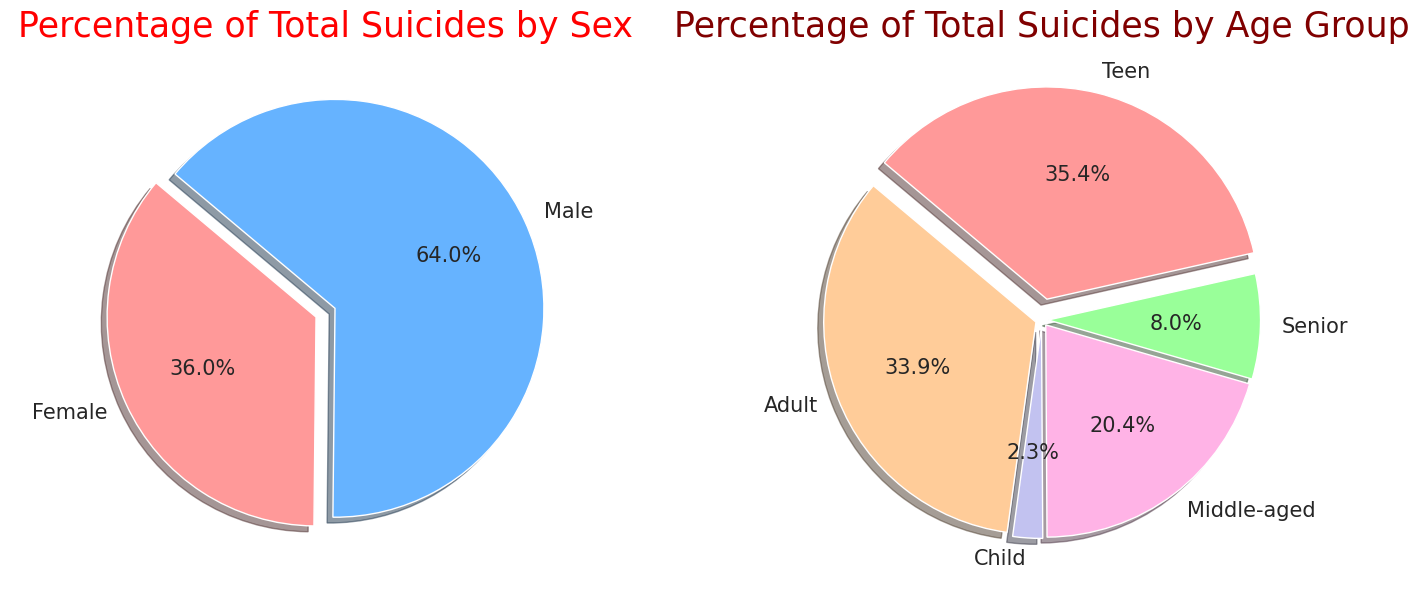

In [ ]:
# Grouping the data by sex and age and summing the suicides_no
grouped_sex = dfs.groupby('Gender')['Total'].sum()
grouped_age = dfs.groupby('Age_category')['Total'].sum()

# total suicides
total_suicides = dfs['Total'].sum()

# percentage of total suicides for each sex and age group
percentages_sex = grouped_sex / total_suicides * 100
percentages_age = grouped_age / total_suicides * 100

colors_sex = ['#ff9999', '#66b3ff']
colors_age = ['#ffcc99', '#c2c2f0', '#ffb3e6', '#99ff99', '#ff9999', '#66b3ff']  # Custom colors for age groups

explode_sex = (0.1, 0)

explode_age = (0.03, 0.03, 0.03, 0.03, 0.1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.8)

# Plotting percentage of total male/female suicides
axes[0].pie(percentages_sex, labels=percentages_sex.index, autopct='%1.1f%%', startangle=140, colors=colors_sex, explode=explode_sex, shadow=True,textprops={'fontsize':15})
axes[0].set_title('Percentage of Total Suicides by Sex',size=25,color='red')

# Plotting percentage of total age groups
axes[1].pie(percentages_age, labels=percentages_age.index, autopct='%1.1f%%', startangle=140, colors=colors_age, explode=explode_age, shadow=True,textprops={'fontsize':15})
axes[1].set_title('Percentage of Total Suicides by Age Group',size=25,color='maroon')

# equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

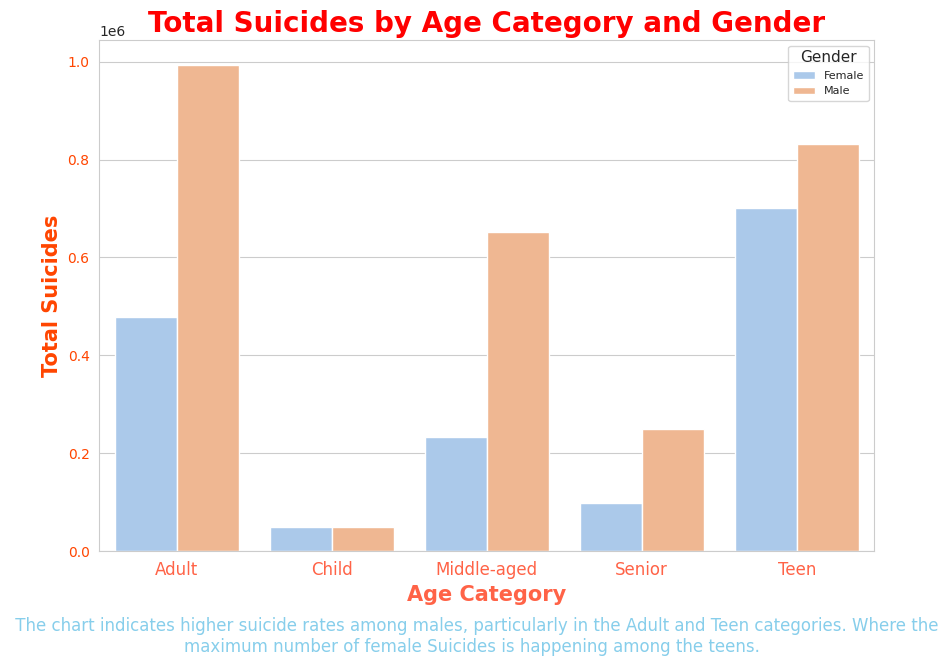

In [ ]:
# by Age_category and Gender
agg_data = dfs.groupby(['Age_category', 'Gender'])['Total'].sum().reset_index()

sns.set_style("whitegrid")

# bar plot
plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(x='Age_category', y='Total', hue='Gender', data=agg_data, palette='pastel')

plt.title('Total Suicides by Age Category and Gender', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Age Category', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=10, color='orangered')
plt.legend(title='Gender', title_fontsize='11', fontsize='8')

# Adding the descriptive text below the chart
description = (
    ' The chart indicates higher suicide rates among males, particularly in the Adult and Teen categories. '
    'Where the maximum number of female Suicides is happening among the teens. '
    )

plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=12, color='skyblue')
plt.subplots_adjust(bottom=0.15)

plt.show()

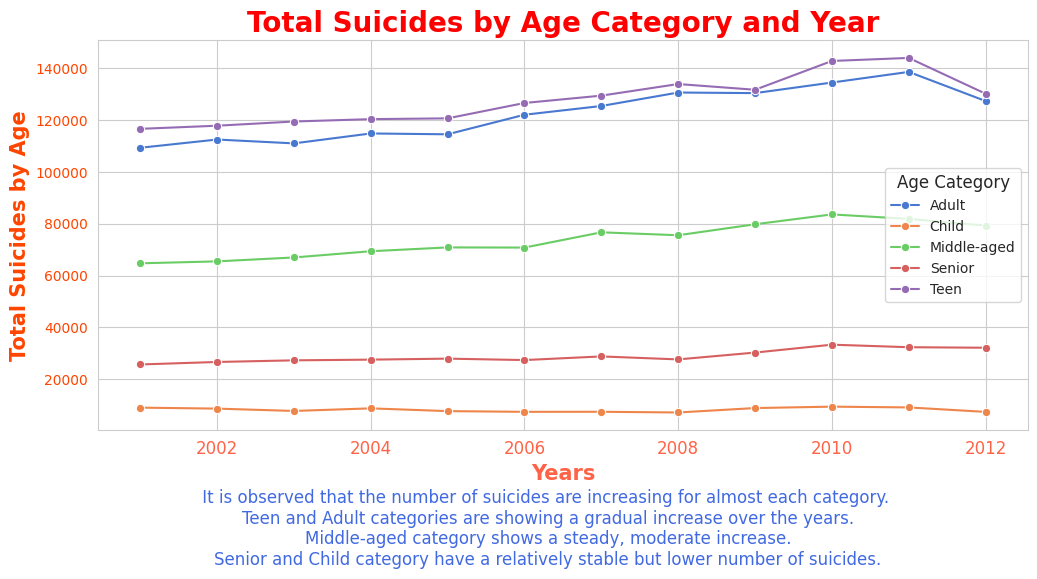

In [ ]:
#by 'Year' and 'Age_category'
agg_data = dfs.groupby(['Year', 'Age_category'])['Total'].sum().reset_index()

sns.set_style("whitegrid")

# line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=agg_data, x='Year', y='Total', hue='Age_category', marker='o', palette='muted')

plt.title('Total Suicides by Age Category and Year',  fontsize=20, color='red', fontweight='bold')
plt.xlabel('Years', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides by Age', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=10, color='orangered')
plt.legend(title='Age Category', title_fontsize='12', fontsize='10')

description = (
    ' It is observed that the number of suicides are increasing for almost each category.  \n'
    'Teen and Adult categories are showing a gradual increase over the years.\n'
'Middle-aged category shows a steady, moderate increase.\n'
'Senior and Child category have a relatively stable but lower number of suicides.'
    )

plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=12, color='royalblue')
plt.subplots_adjust(bottom=0.23)

plt.show()


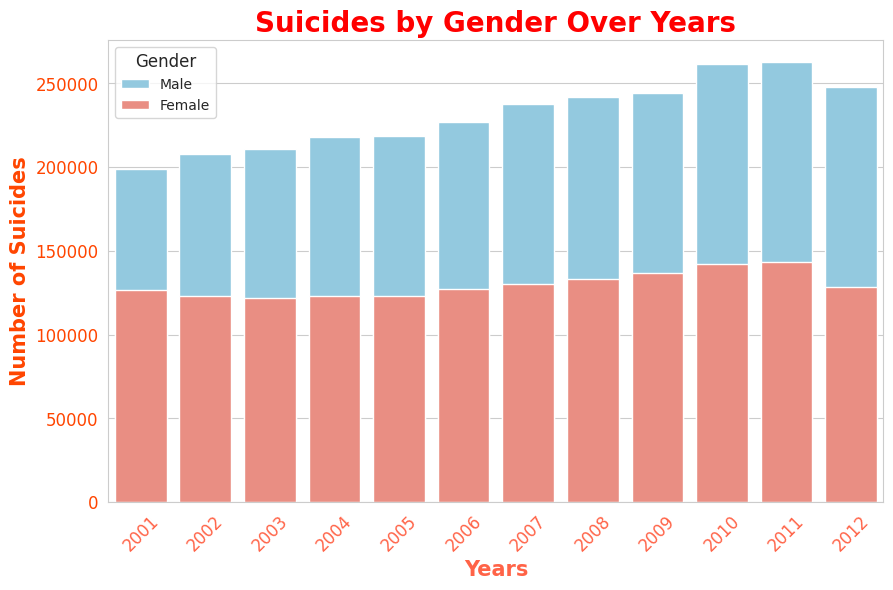

In [ ]:
plt.figure(figsize=(10, 6))

#male
sns.barplot(data=gender_sum_year[gender_sum_year['Gender'] == 'Male'], x='Year', y='Total', color='skyblue', label='Male')

# female
sns.barplot(data=gender_sum_year[gender_sum_year['Gender'] == 'Female'], x='Year', y='Total', color='salmon', label='Female')

plt.title('Suicides by Gender Over Years',fontsize=20, color='red', fontweight='bold')
plt.xlabel('Years', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Number of Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato',rotation=45)
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Gender', title_fontsize='12', fontsize='10')

plt.show()

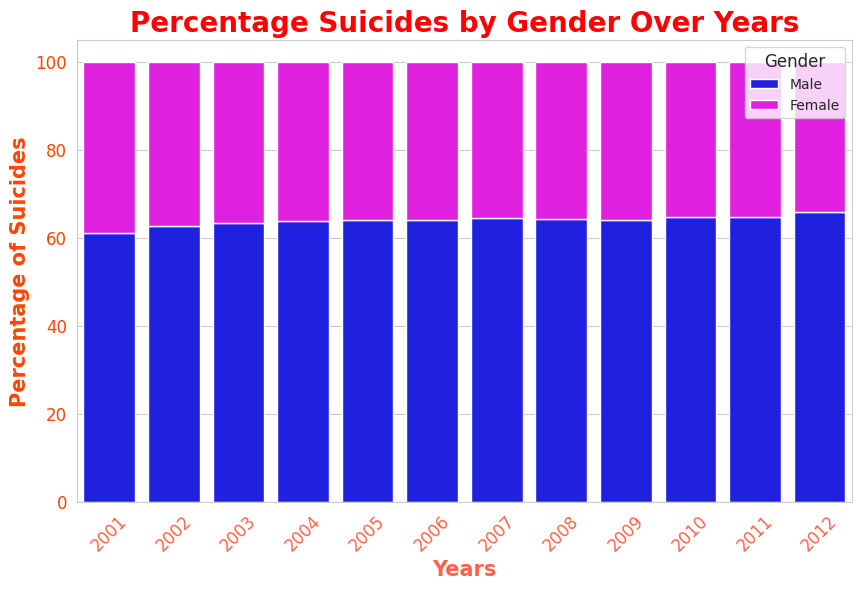

In [ ]:
gender_sum_year = dfs.groupby(['Year', 'Gender'])['Total'].sum().reset_index()
sum_year = dfs.groupby(['Year'])['Total'].sum().reset_index()
# Merge sum of 'Total' for all genders with the gender_sum_year dataframe
gender_sum_year = gender_sum_year.merge(sum_year, on='Year', suffixes=('', '_total'))

# Calculate the percentage for each gender for each year
gender_sum_year['Percentage'] = (gender_sum_year['Total'] / gender_sum_year['Total_total']) * 100

# Drop the redundant total column
gender_sum_year.drop(columns='Total_total', inplace=True)


plt.figure(figsize=(10, 6))

#  male percentages
sns.barplot(data=gender_sum_year[gender_sum_year['Gender'] == 'Male'], x='Year', y='Percentage', color='blue', label='Male')

#female percentages on top of male percentages
sns.barplot(data=gender_sum_year[gender_sum_year['Gender'] == 'Female'], x='Year', y='Percentage', color='magenta', label='Female',bottom=gender_sum_year[gender_sum_year['Gender'] == 'Male']['Percentage'])

plt.title('Percentage Suicides by Gender Over Years',  fontsize=20, color='red', fontweight='bold')
plt.xlabel('Years', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Percentage of Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato',rotation=45)
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Gender', title_fontsize='12', fontsize='10')

plt.show()

# Analysis on the different Type_code

In [ ]:
dfs['Type_code'].unique()

array(['Causes', 'Means_adopted', 'Professional_Profile'], dtype=object)

In [ ]:
# Filter data for 'Causes'
causes = dfs.loc[dfs['Type_code'] == 'Causes']

# Filter data for 'Means_adopted'
means_adopted = dfs.loc[dfs['Type_code'] == 'Means_adopted']

# Filter data for 'Professional_Profile'
professional_profile = dfs.loc[dfs['Type_code'] == 'Professional_Profile']


In [ ]:
print("Causes:")
print(causes['Type'].unique(), "\n")

print("Means_adopted:")
print(means_adopted['Type'].unique(), "\n")

print("Professional_Profile:")
print(professional_profile['Type'].unique(), "\n")


Causes:
['Illness (Aids/STD)' 'Bankruptcy or Sudden change in Economic'
 'Cancellation/Non-Settlement of Marriage'
 'Physical Abuse (Rape/Incest Etc.)' 'Dowry Dispute' 'Family Problems'
 'Ideological Causes/Hero Worshipping' 'Other Prolonged Illness'
 'Property Dispute' 'Fall in Social Reputation' 'Illegitimate Pregnancy'
 'Failure in Examination' 'Insanity/Mental Illness' 'Love Affairs'
 'Professional/Career Problem' 'Divorce' 'Drug Abuse/Addiction'
 'Not having Children(Barrenness/Impotency' 'Causes Not known'
 'Unemployment' 'Other Causes (Please Specity)' 'Poverty'
 'Death of Dear Person' 'Cancer' 'Suspected/Illicit Relation' 'Paralysis'
 'Bankruptcy or Sudden change in Economic Status'
 'Not having Children (Barrenness/Impotency'] 

Means_adopted:
['By Consuming Insecticides' 'By Hanging' 'By Jumping from (Other sites)'
 'By touching electric wires' 'By Machine' 'By Fire/Self Immolation'
 'By Jumping off Moving Vehicles/Trains' 'By Other means (please specify)'
 'By Self Inflictio

<ipython-input-56-0f34fcc1b53c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=causes_agg, palette='viridis')


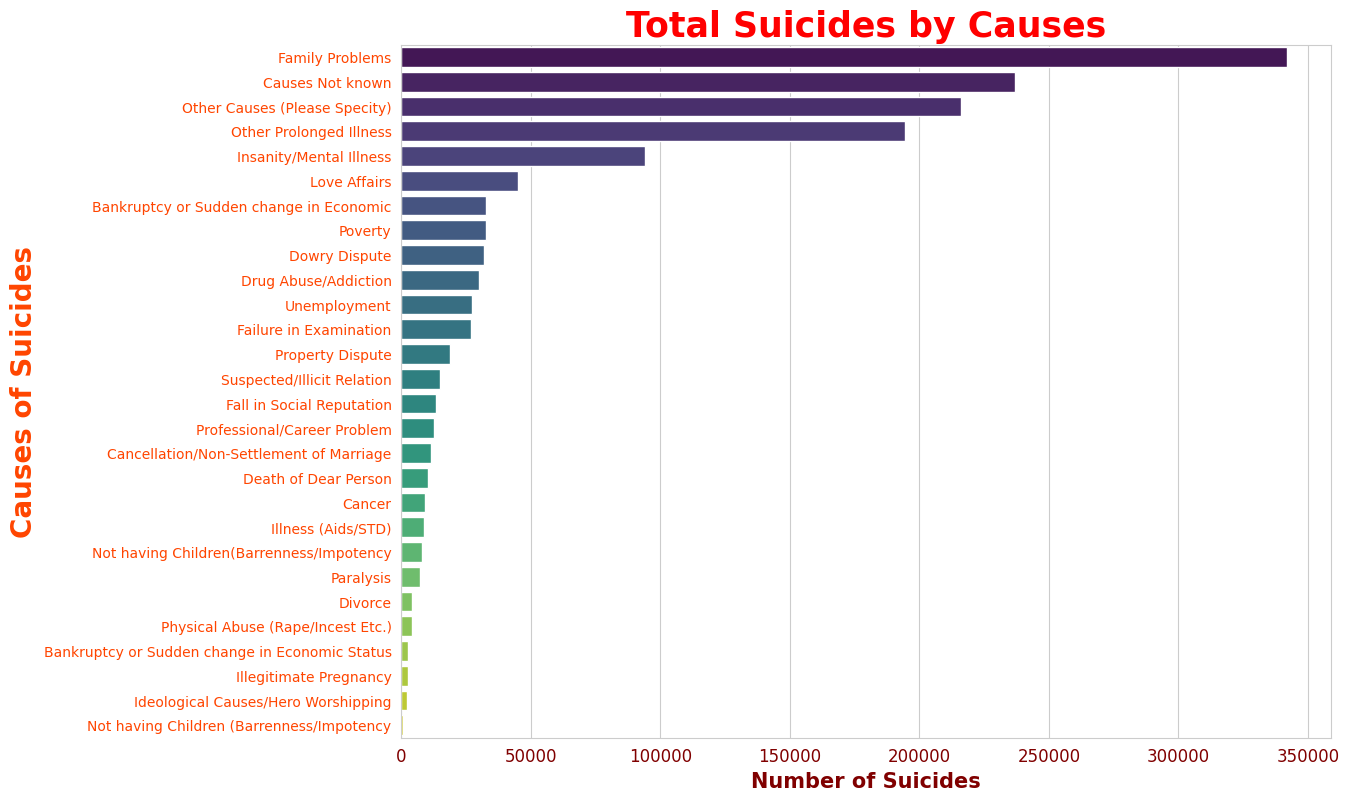

<ipython-input-56-0f34fcc1b53c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=means_adopted_agg, palette='viridis')


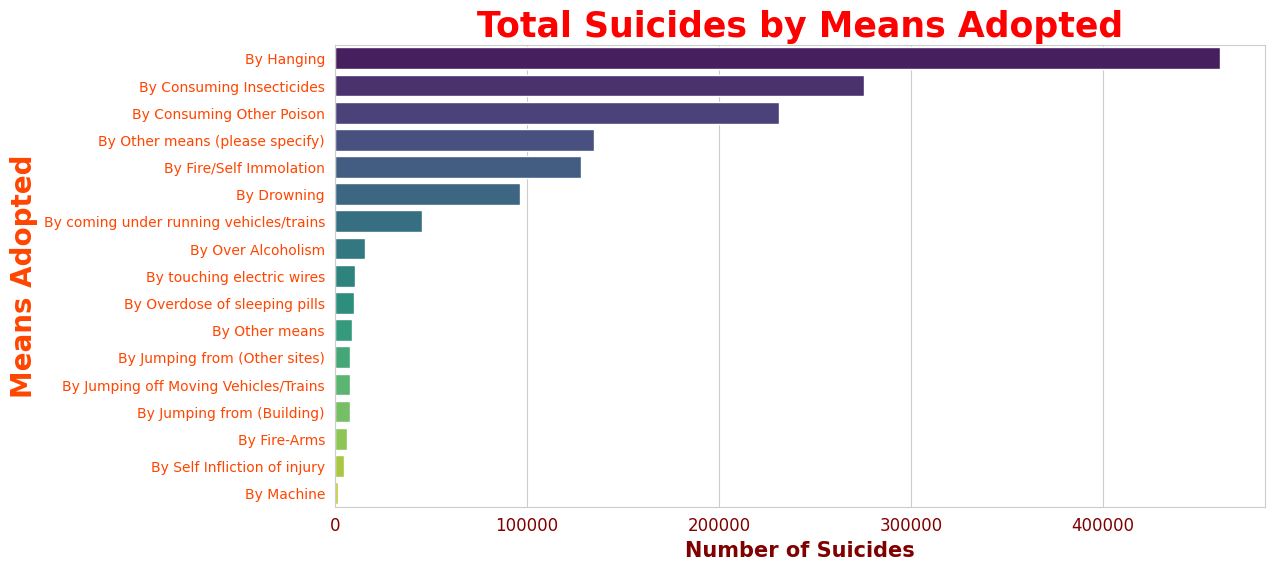

<ipython-input-56-0f34fcc1b53c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=professional_profile_agg, palette='viridis')


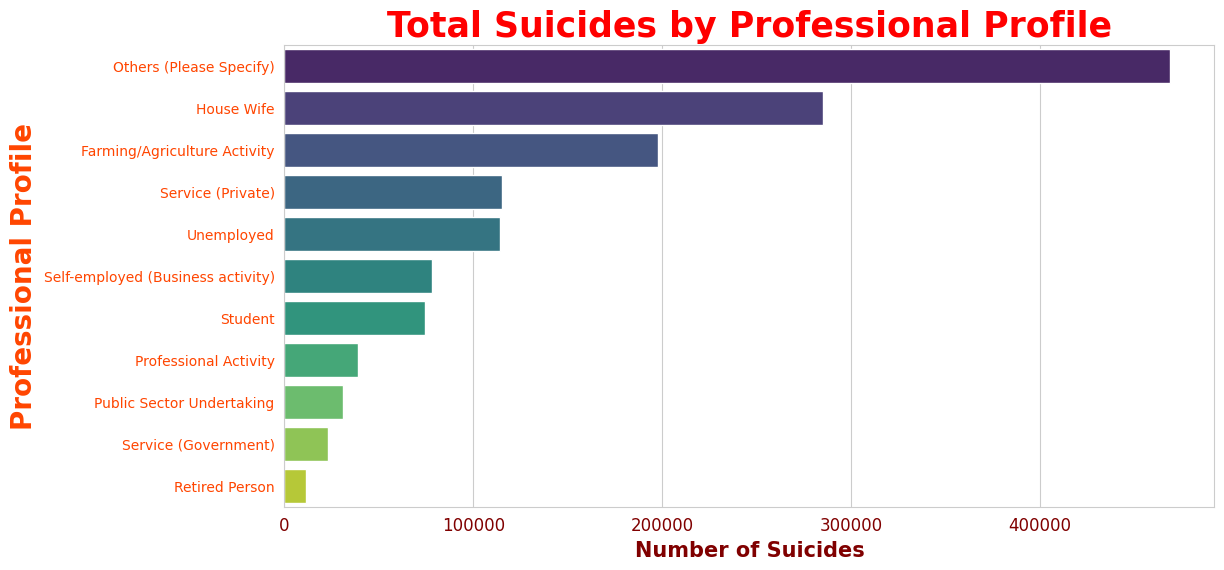

In [ ]:

# Aggregate data by 'Type' for each category
causes_agg = causes.groupby('Type')['Total'].sum().reset_index()
means_adopted_agg = means_adopted.groupby('Type')['Total'].sum().reset_index()
professional_profile_agg = professional_profile.groupby('Type')['Total'].sum().reset_index()

# Sort data by 'Total' in descending order
causes_agg = causes_agg.sort_values(by='Total', ascending=False)
means_adopted_agg = means_adopted_agg.sort_values(by='Total', ascending=False)
professional_profile_agg = professional_profile_agg.sort_values(by='Total', ascending=False)

# Set the style
sns.set_style("whitegrid")

# Plot for 'Causes'
plt.figure(figsize=(12, 9))
sns.barplot(x='Total', y='Type', data=causes_agg, palette='viridis')
plt.title('Total Suicides by Causes', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Causes of Suicides', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')
plt.show()

# Plot for 'Means Adopted'
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', data=means_adopted_agg, palette='viridis')
plt.title('Total Suicides by Means Adopted', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Means Adopted', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')
plt.show()

# Plot for 'Professional Profile'
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', data=professional_profile_agg, palette='viridis')
plt.title('Total Suicides by Professional Profile', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Professional Profile', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')
plt.show()


In [ ]:
causes.head()

,State,Year,Type_code,Type,Gender,Total,Age_category
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0,Child
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0,Child
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0,Child
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0,Child
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0,Child


# Deep Analysis for different Causes

<ipython-input-74-ed37738671c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=causes_agg, palette='pastel')


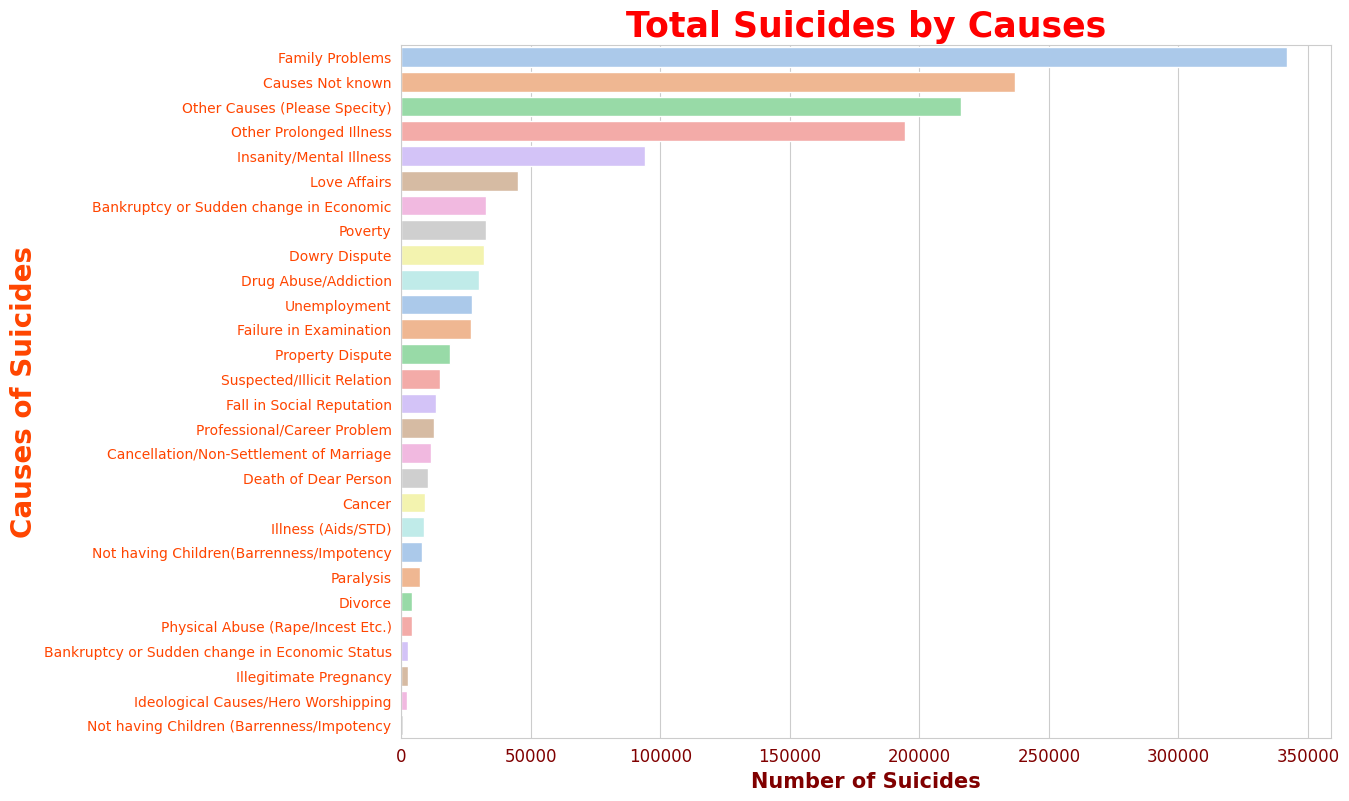

In [ ]:
# Aggregate data by 'Type' for each category
causes_agg = causes.groupby('Type')['Total'].sum().reset_index()

causes_agg = causes_agg.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

# Plot for 'Causes'
plt.figure(figsize=(12, 9))
sns.barplot(x='Total', y='Type', data=causes_agg, palette='pastel')
plt.title('Total Suicides by Causes', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Causes of Suicides', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')

plt.show()


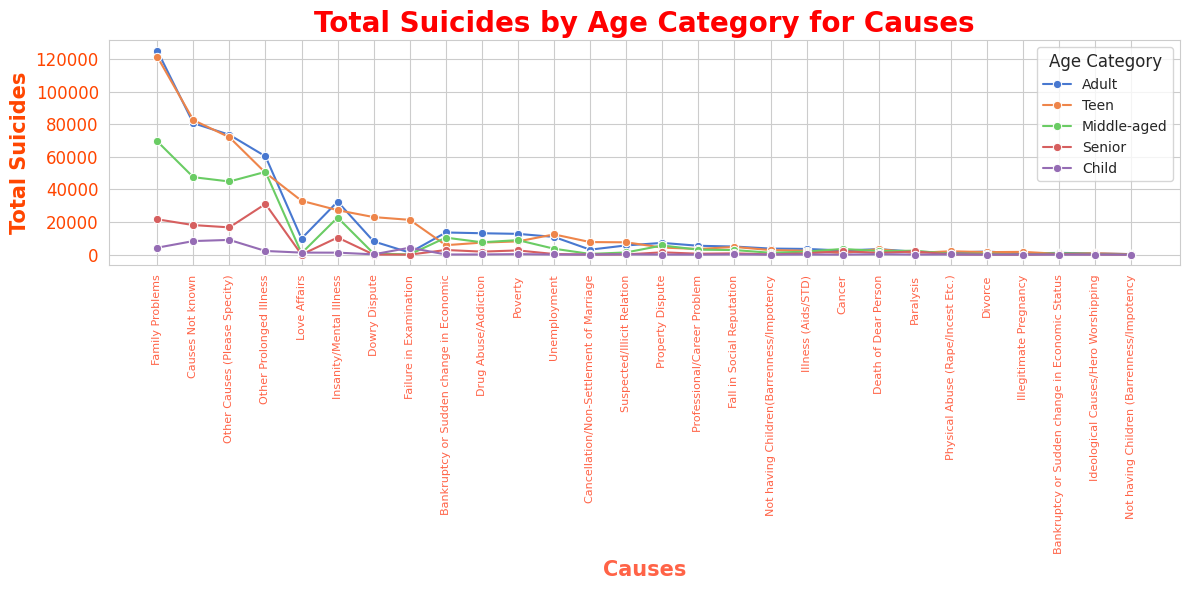

In [ ]:
# by 'Year' and 'Age_category'
agg_data = causes.groupby(['Type', 'Age_category'])['Total'].sum().reset_index()
#sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=agg_data, x='Type', y='Total', hue='Age_category', marker='o', palette='muted')

plt.title('Total Suicides by Age Category for Causes', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Causes', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=8, color='tomato',rotation=90)
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Age Category', title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()


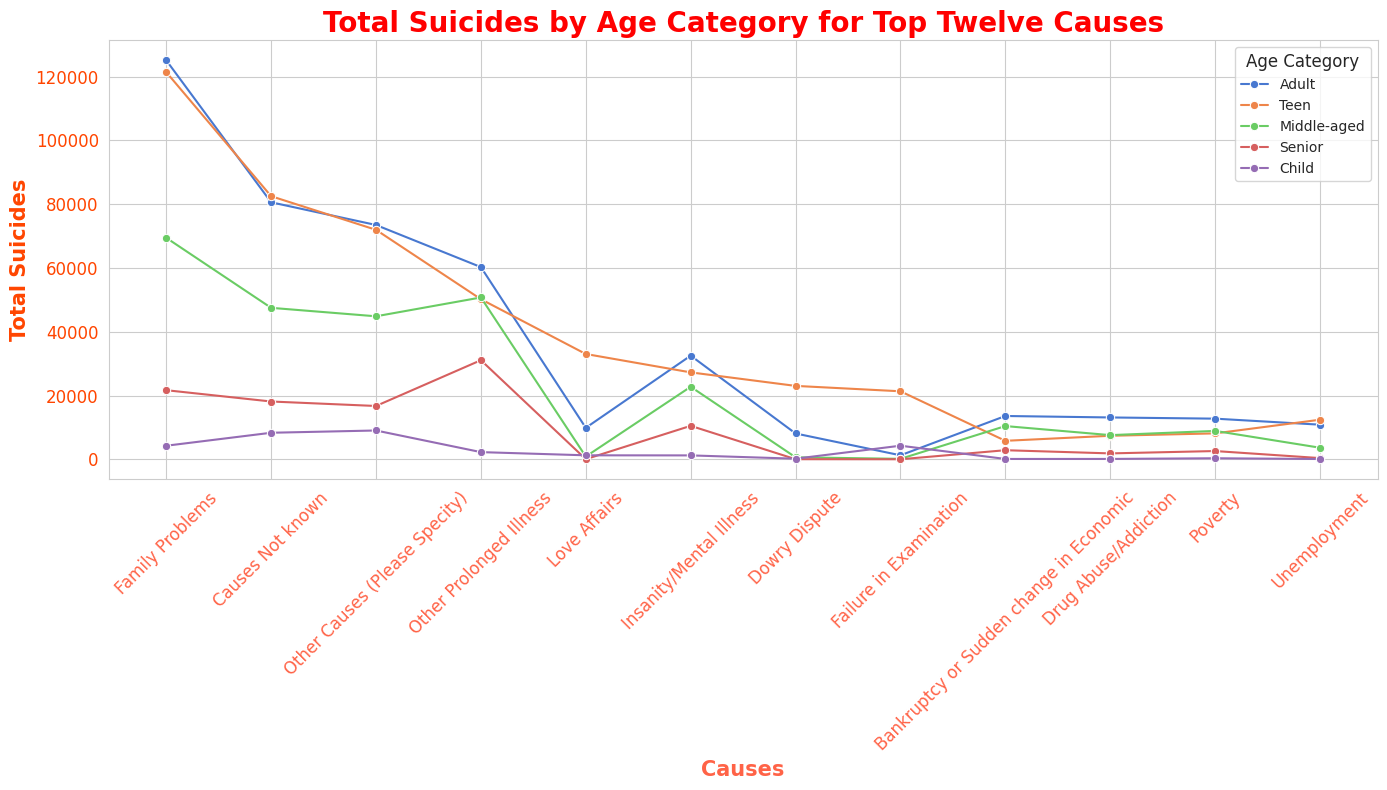

In [ ]:
# data by 'Type' to get the sum of 'Total' suicides
agg_data_by_type = causes.groupby('Type')['Total'].sum().reset_index()

#top twelve causes
top_tw_causes = agg_data_by_type.nlargest(12, 'Total')['Type'].tolist()

# filtering the original 'causes' data to include only the top twelve causes
top_tw_data = causes[causes['Type'].isin(top_tw_causes)]

#by 'Type' and 'Age_category'
agg_data = top_tw_data.groupby(['Type', 'Age_category'])['Total'].sum().reset_index()

#sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#line plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(data=agg_data, x='Type', y='Total', hue='Age_category', marker='o', palette='muted')

plt.xticks(rotation=45)
plt.title('Total Suicides by Age Category for Top Twelve Causes', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Causes', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Age Category', title_fontsize='12', fontsize='10')

# Show the plot
plt.tight_layout()
plt.show()


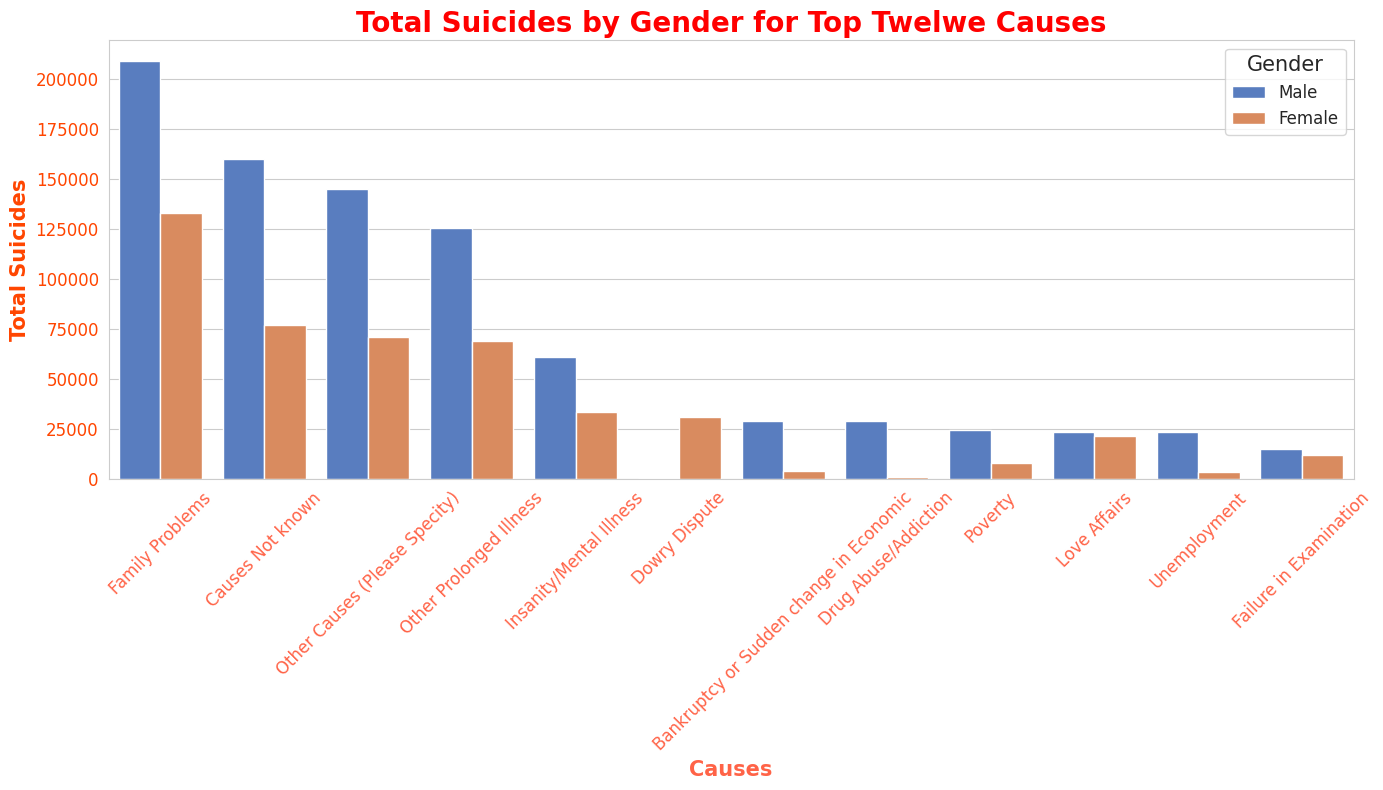

In [ ]:
# data by 'Type' to get the sum of 'Total' suicides
agg_data_by_type = causes.groupby('Type')['Total'].sum().reset_index()

#top twelve causes
top_tw_causes = agg_data_by_type.nlargest(12, 'Total')['Type'].tolist()

# filtering the original 'causes' data to include only the top ten causes
top_tw_data = causes[causes['Type'].isin(top_tw_causes)]

#by 'Type' and 'Age_category'
agg_data = top_tw_data.groupby(['Type', 'Gender'])['Total'].sum().reset_index()

#sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=agg_data, x='Type', y='Total', hue='Gender', palette='muted')

plt.xticks(rotation=45)
plt.title('Total Suicides by Gender for Top Twelwe Causes', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Causes', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Gender', title_fontsize='15', fontsize='12')

# Show the plot
plt.tight_layout()
plt.show()

# Deep Analysis of Means Adopted for Suicide

<ipython-input-73-8e9d4d8e957c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=means_adopted_agg, palette='pastel')


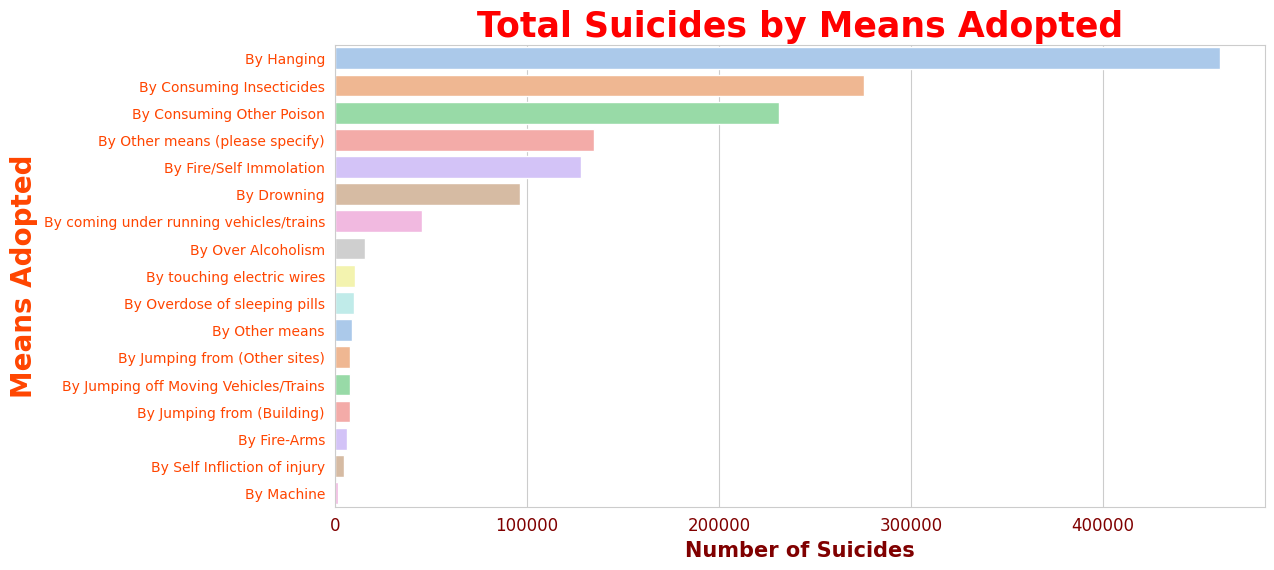

In [ ]:
# Plot for 'Means Adopted'

means_adopted_agg = means_adopted.groupby('Type')['Total'].sum().reset_index()

means_adopted_agg = means_adopted_agg.sort_values(by='Total', ascending=False)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', data=means_adopted_agg, palette='pastel')
plt.title('Total Suicides by Means Adopted', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Means Adopted', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')
plt.show()

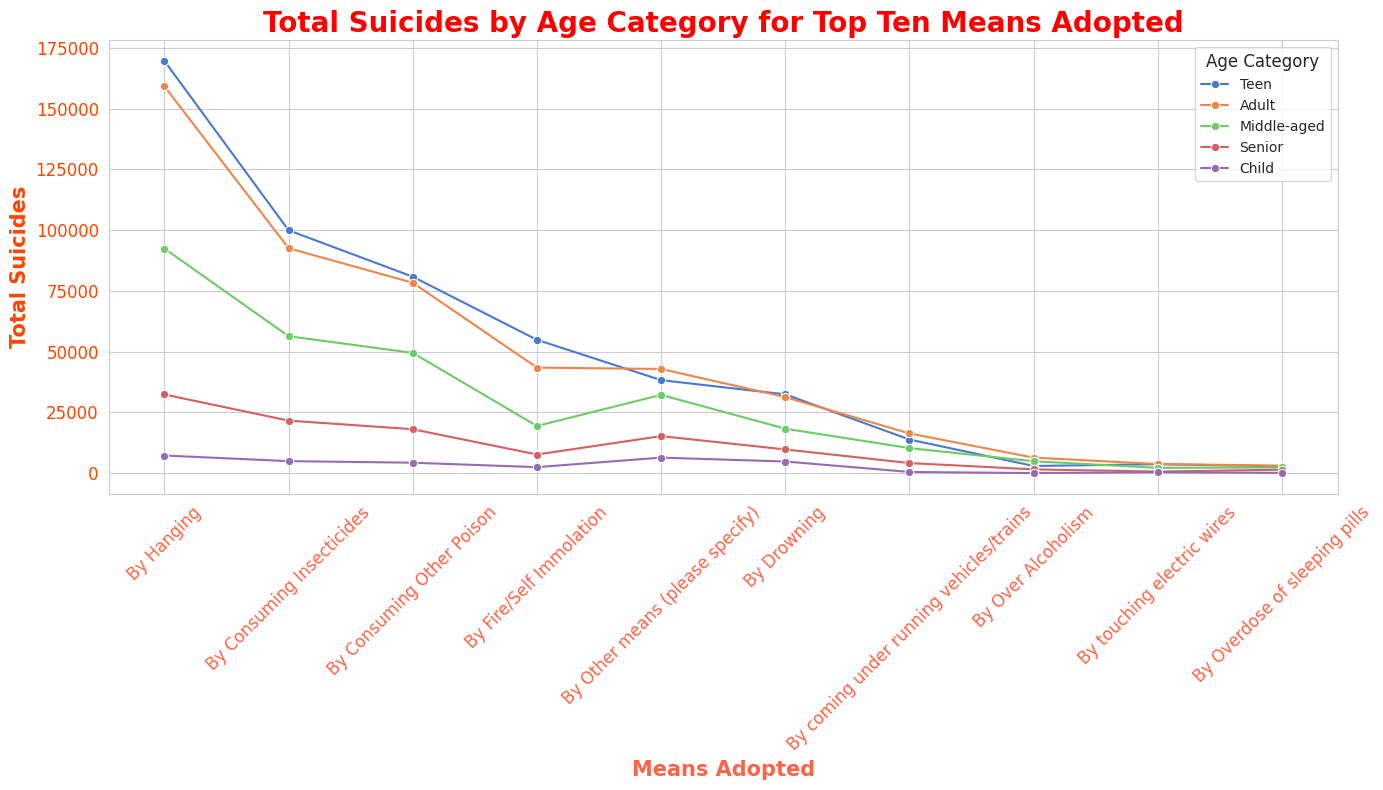

In [ ]:
# filtering data for 'Means_adopted'
means_adopted = dfs.loc[dfs['Type_code'] == 'Means_adopted']

# by 'Type' (Means Adopted) to get the sum of 'Total' suicides
agg_data_by_means = means_adopted.groupby('Type')['Total'].sum().reset_index()

# top ten means adopted
top_ten_means = agg_data_by_means.nlargest(10, 'Total')['Type'].tolist()

# filtering the original 'means_adopted' data to include only the top ten means adopted
top_ten_means_data = means_adopted[means_adopted['Type'].isin(top_ten_means)]

#  by 'Type' and 'Age_category'
agg_data = top_ten_means_data.groupby(['Type', 'Age_category'])['Total'].sum().reset_index()

  #sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#line plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(data=agg_data, x='Type', y='Total', hue='Age_category', marker='o', palette='muted')

plt.xticks(rotation=45)

plt.title('Total Suicides by Age Category for Top Ten Means Adopted', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Means Adopted', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Age Category', title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()

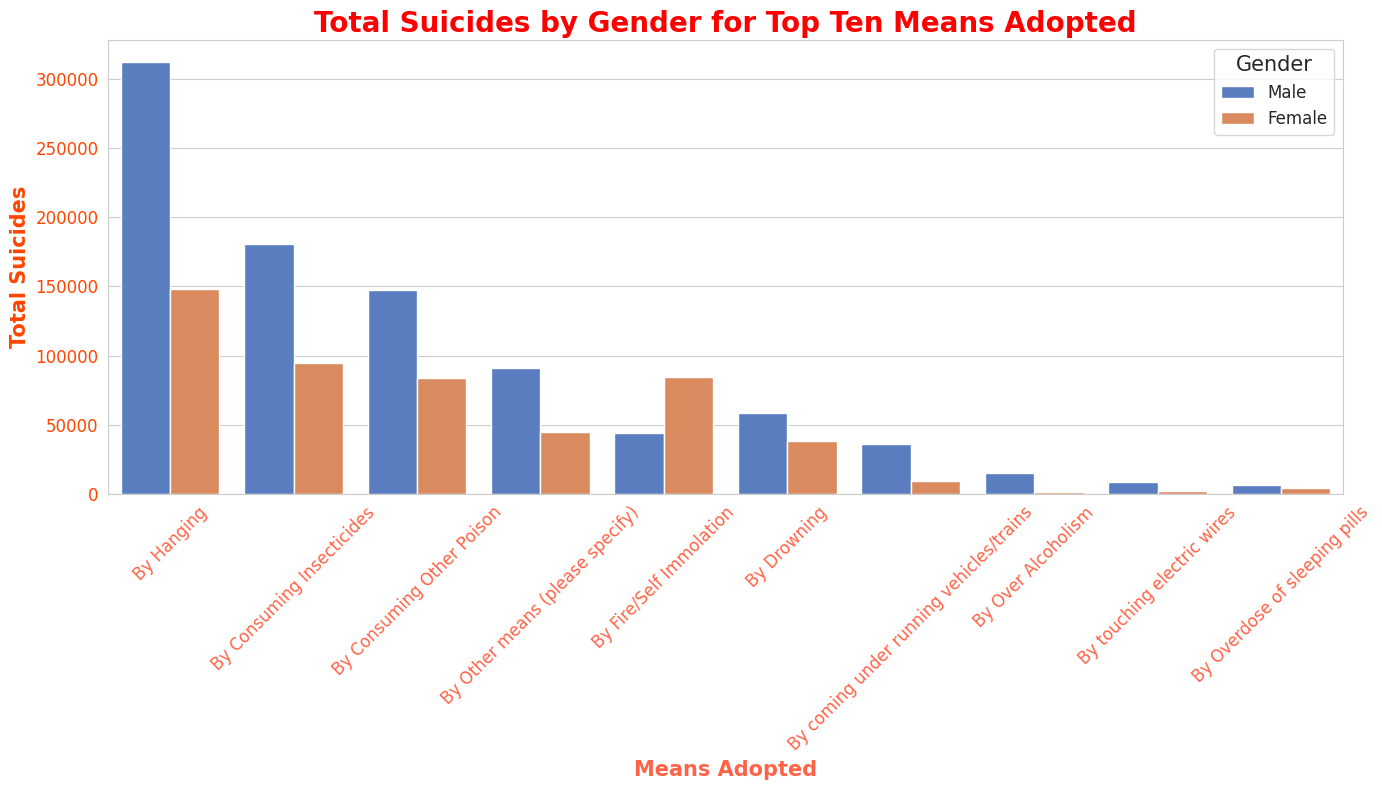

In [ ]:
# filtering data for 'Means_adopted'
means_adopted = dfs.loc[dfs['Type_code'] == 'Means_adopted']

# by 'Type' (Means Adopted) to get the sum of 'Total' suicides
agg_data_by_means = means_adopted.groupby('Type')['Total'].sum().reset_index()

# top ten means adopted
top_ten_means = agg_data_by_means.nlargest(10, 'Total')['Type'].tolist()

# filtering the original 'means_adopted' data to include only the top ten means adopted
top_ten_means_data = means_adopted[means_adopted['Type'].isin(top_ten_means)]

#  by 'Type' and 'Age_category'
agg_data = top_ten_means_data.groupby(['Type', 'Gender'])['Total'].sum().reset_index()

  #sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=agg_data, x='Type', y='Total', hue='Gender', palette='muted')

plt.xticks(rotation=45)

plt.title('Total Suicides by Gender for Top Ten Means Adopted', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Means Adopted', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Gender', title_fontsize='15', fontsize='12')

plt.tight_layout()
plt.show()

# Deep Analysis of different Professions who commited Suicide

<ipython-input-72-b9e61f7573d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Type', data=professional_profile_agg, palette='pastel')


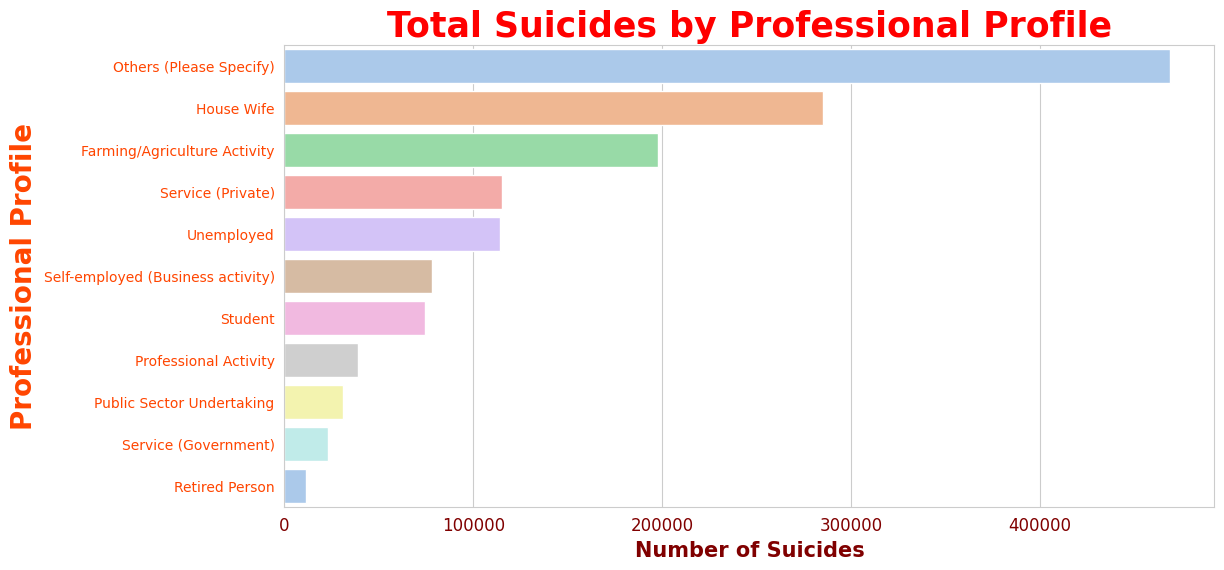

In [ ]:
# Plot for 'Professional Profile'

professional_profile_agg = professional_profile.groupby('Type')['Total'].sum().reset_index()
professional_profile_agg = professional_profile_agg.sort_values(by='Total', ascending=False)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', data=professional_profile_agg, palette='pastel')
plt.title('Total Suicides by Professional Profile', fontsize=25, color='red', fontweight='bold')
plt.xlabel('Number of Suicides', fontsize=15, color='maroon', fontweight='bold')
plt.ylabel('Professional Profile', fontsize=20, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=10, color='orangered')
plt.show()


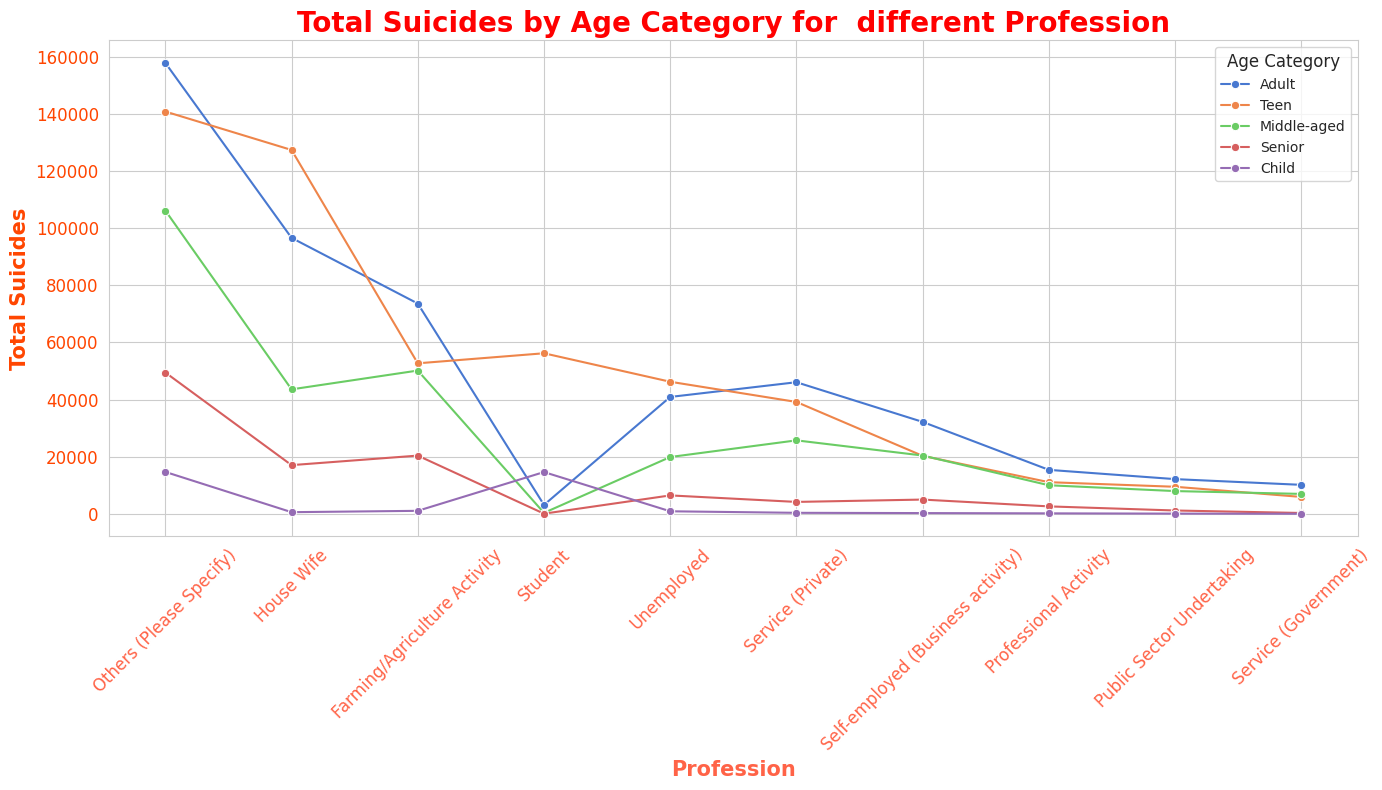

In [ ]:

# Filter data for 'Professional_Profile'
professional_profile = dfs.loc[dfs['Type_code'] == 'Professional_Profile']

agg_data_by_means = professional_profile.groupby('Type')['Total'].sum().reset_index()

# top ten profession
top_ten_means = agg_data_by_means.nlargest(10, 'Total')['Type'].tolist()

# filtering the original 'means_adopted' data to include only the top ten
top_ten_means_data = professional_profile[professional_profile['Type'].isin(top_ten_means)]

#  by 'Type' and 'Age_category'
agg_data = top_ten_means_data.groupby(['Type', 'Age_category'])['Total'].sum().reset_index()

  #sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#line plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(data=agg_data, x='Type', y='Total', hue='Age_category', marker='o', palette='muted')

plt.xticks(rotation=45)

plt.title('Total Suicides by Age Category for  different Profession', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Profession', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Age Category', title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()

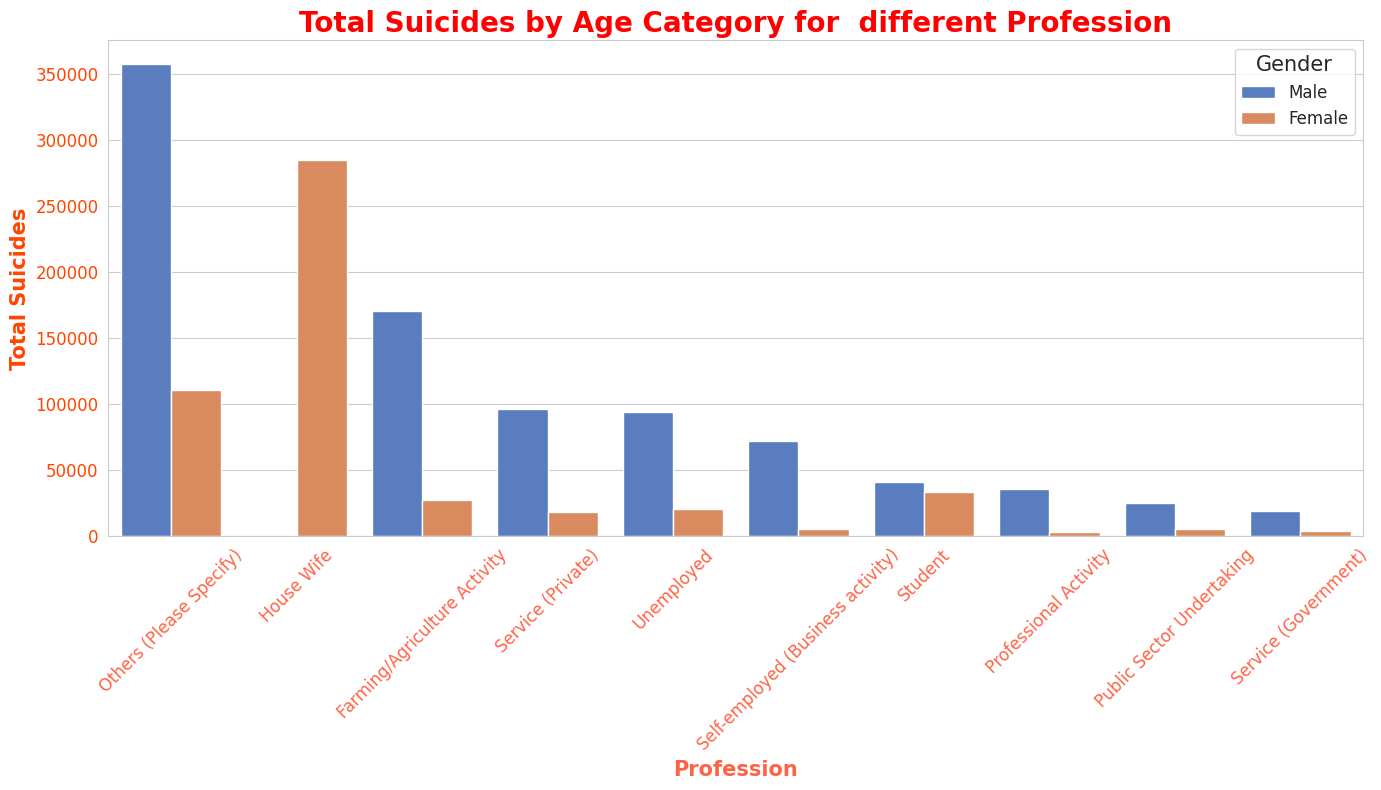

In [ ]:

# Filter data for 'Professional_Profile'
professional_profile = dfs.loc[dfs['Type_code'] == 'Professional_Profile']

# by 'Type' (Means Adopted) to get the sum of 'Total' suicides
agg_data_by_means = professional_profile.groupby('Type')['Total'].sum().reset_index()

# top ten means adopted
top_ten_means = agg_data_by_means.nlargest(10, 'Total')['Type'].tolist()

# filtering the original 'means_adopted' data to include only the top ten means adopted
top_ten_means_data = professional_profile[professional_profile['Type'].isin(top_ten_means)]

#  by 'Type' and 'Age_category'
agg_data = top_ten_means_data.groupby(['Type', 'Gender'])['Total'].sum().reset_index()

  #sorting the data
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")

#bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=agg_data, x='Type', y='Total', hue='Gender',  palette='muted')

plt.xticks(rotation=45)

plt.title('Total Suicides by Age Category for  different Profession', fontsize=20, color='red', fontweight='bold')
plt.xlabel('Profession', fontsize=15, color='tomato', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=15, color='orangered', fontweight='bold')
plt.xticks(fontsize=12, color='tomato')
plt.yticks(fontsize=12, color='orangered')
plt.legend(title='Gender', title_fontsize='15', fontsize='12')

plt.tight_layout()
plt.show()

# Analysing the different Locations (also getting insight of top 15 locations)



<ipython-input-84-00ff01bebc85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=agg_data, x='Total', y='State', palette='viridis')


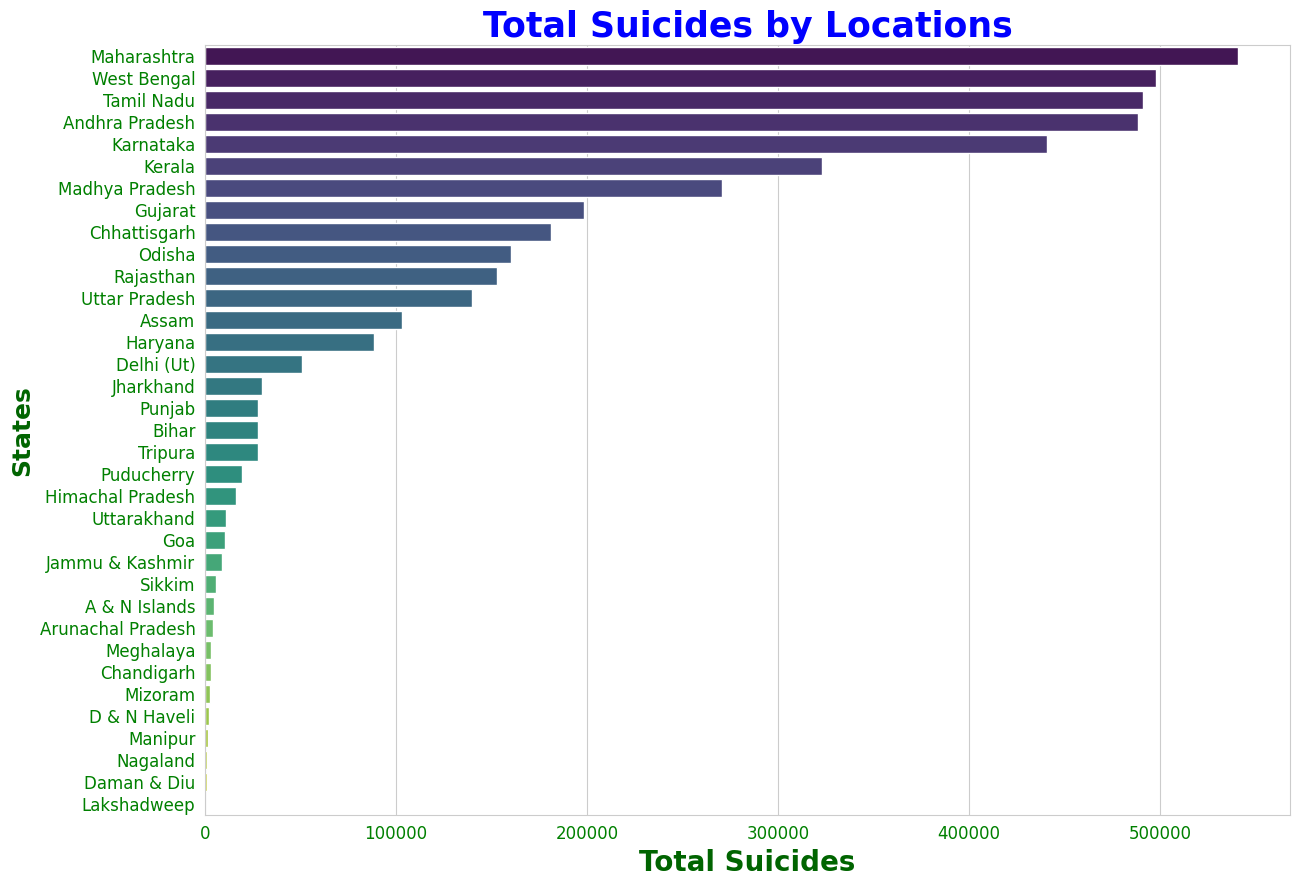

In [ ]:
# by 'State'
agg_data = dfs.groupby('State')['Total'].sum().reset_index()

# Sorting the data by 'Total'
agg_data = agg_data.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(data=agg_data, x='Total', y='State', palette='viridis')

plt.title('Total Suicides by Locations', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('Total Suicides', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('States', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green')
plt.yticks(fontsize=12, color='green')

plt.show()

**Analysing top 15 locations of suicides based on different parameters.**

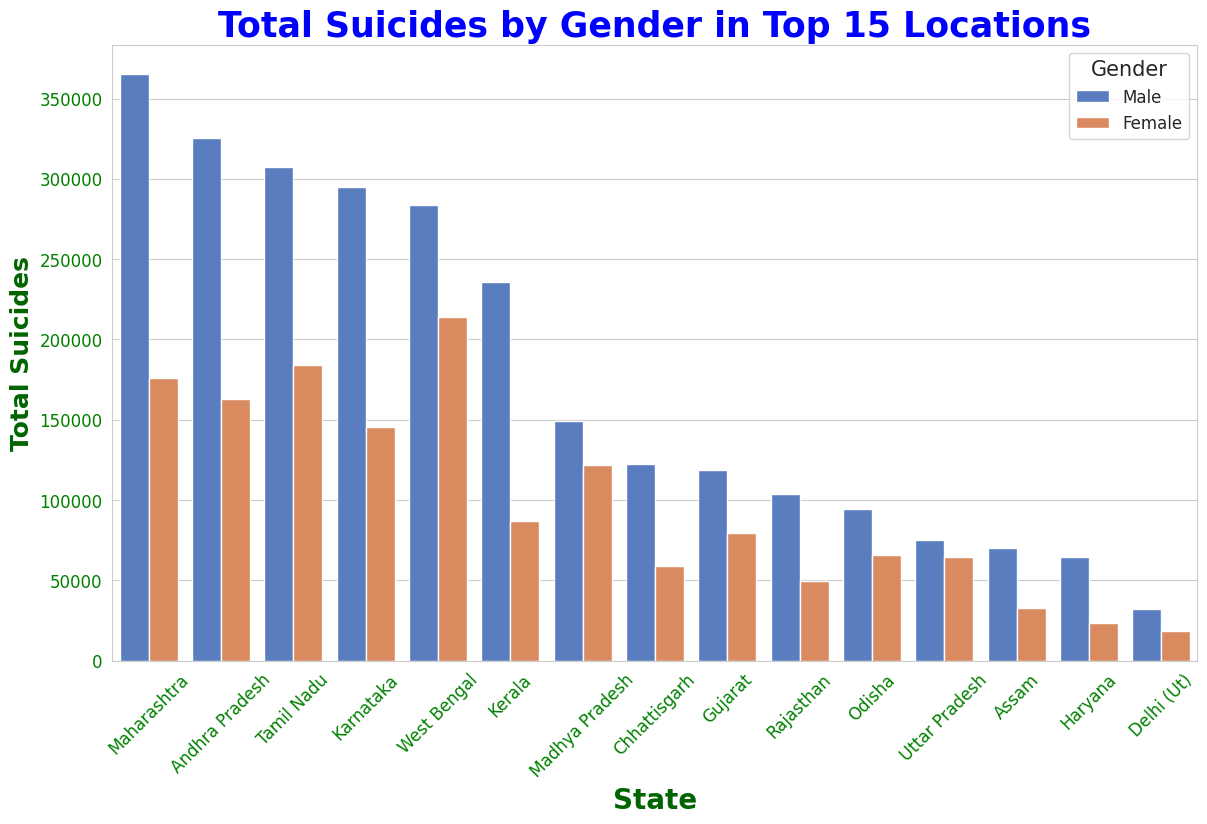

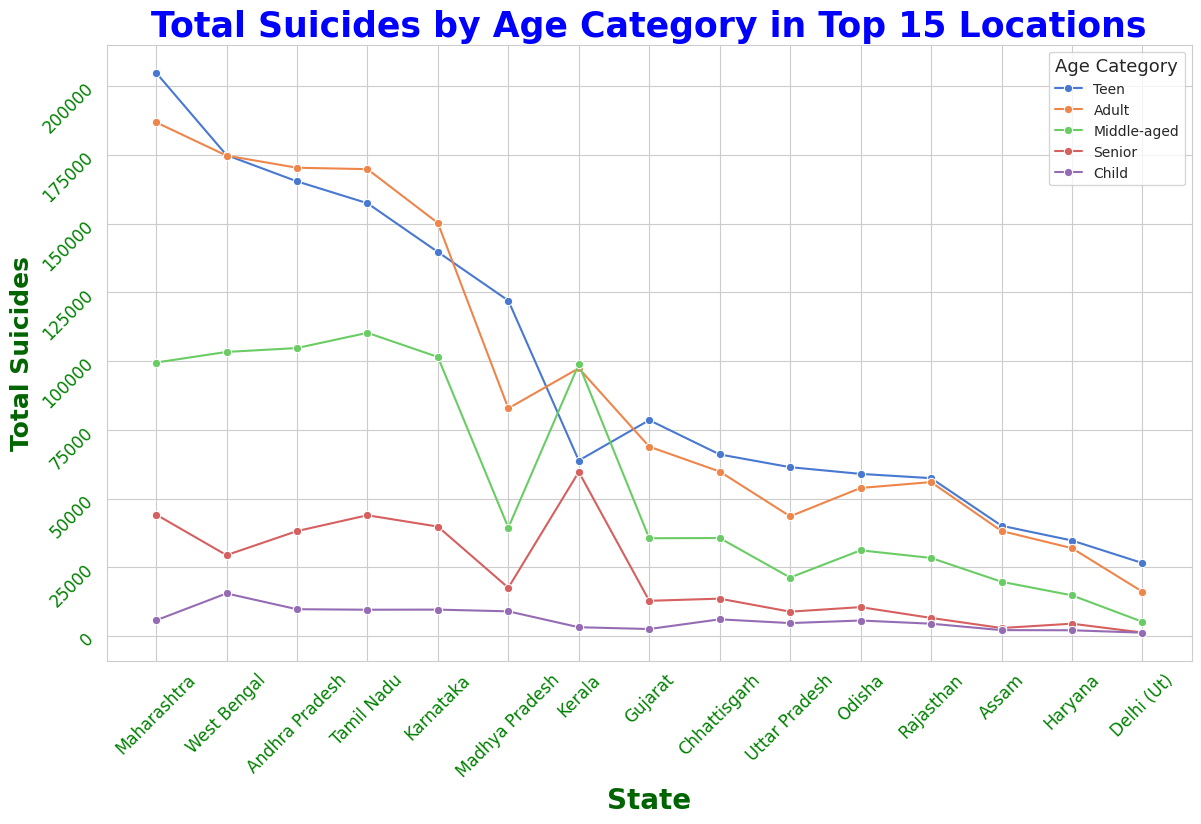

In [ ]:
# Aggregate data by state and calculate the total number of cases
agg_data_by_type = dfs.groupby('State')['Total'].sum().reset_index()

# Get the top 15 locations with the most suicides
top_15_states = agg_data_by_type.nlargest(15, 'Total')['State'].tolist()

# Filter the data to include only the top 15 states
top_15_data = dfs[dfs['State'].isin(top_15_states)]

# Aggregate data by state and gender
gen_data = top_15_data.groupby(['State', 'Gender'])['Total'].sum().reset_index()
gen_data = gen_data.sort_values(by='Total', ascending=False)
# Aggregate data by state and age category
age_data = top_15_data.groupby(['State', 'Age_category'])['Total'].sum().reset_index()
age_data = age_data.sort_values(by='Total', ascending=False)

# Create a bar plot for gender in the top 15 locations
plt.figure(figsize=(14, 8))
sns.barplot(data=gen_data, x='State', y='Total', hue='Gender', palette='muted')
plt.title('Total Suicides by Gender in Top 15 Locations', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('State', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green', rotation=45)
plt.yticks(fontsize=12, color='green')
plt.legend(title='Gender', title_fontsize='15', fontsize='12')
plt.show()

# Create a line plot for age category in the top 15 locations
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_data, x='State', y='Total', hue='Age_category', marker='o', palette='muted')
plt.title('Total Suicides by Age Category in Top 15 Locations', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('State', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green', rotation=45)
plt.yticks(fontsize=12, color='green', rotation=45)
plt.legend(title='Age Category', title_fontsize='13', fontsize='10')
plt.show()

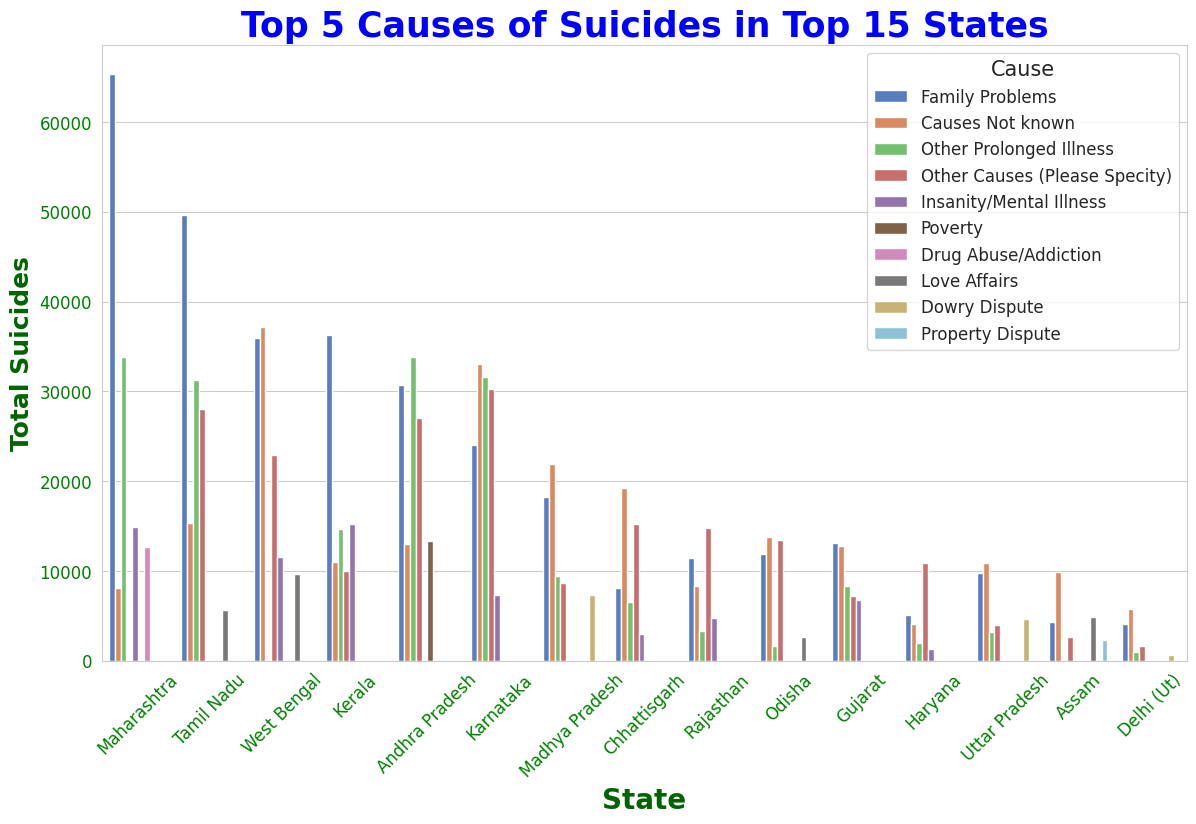

In [ ]:
# Filter data for 'Causes'
causes_data = top_15_data[top_15_data['Type_code'] == 'Causes']

# Aggregate and get top 5 causes for each state
top_5_causes = causes_data.groupby(['State', 'Type'])['Total'].sum().reset_index()
top_5_causes = top_5_causes.groupby('State').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
top_5_causes = top_5_causes.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=top_5_causes, x='State', y='Total', hue='Type', palette='muted')
plt.title('Top 5 Causes of Suicides in Top 15 States', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('State', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green', rotation=45)
plt.yticks(fontsize=12, color='green')
plt.legend(title='Cause', title_fontsize='15', fontsize='12')
plt.show()

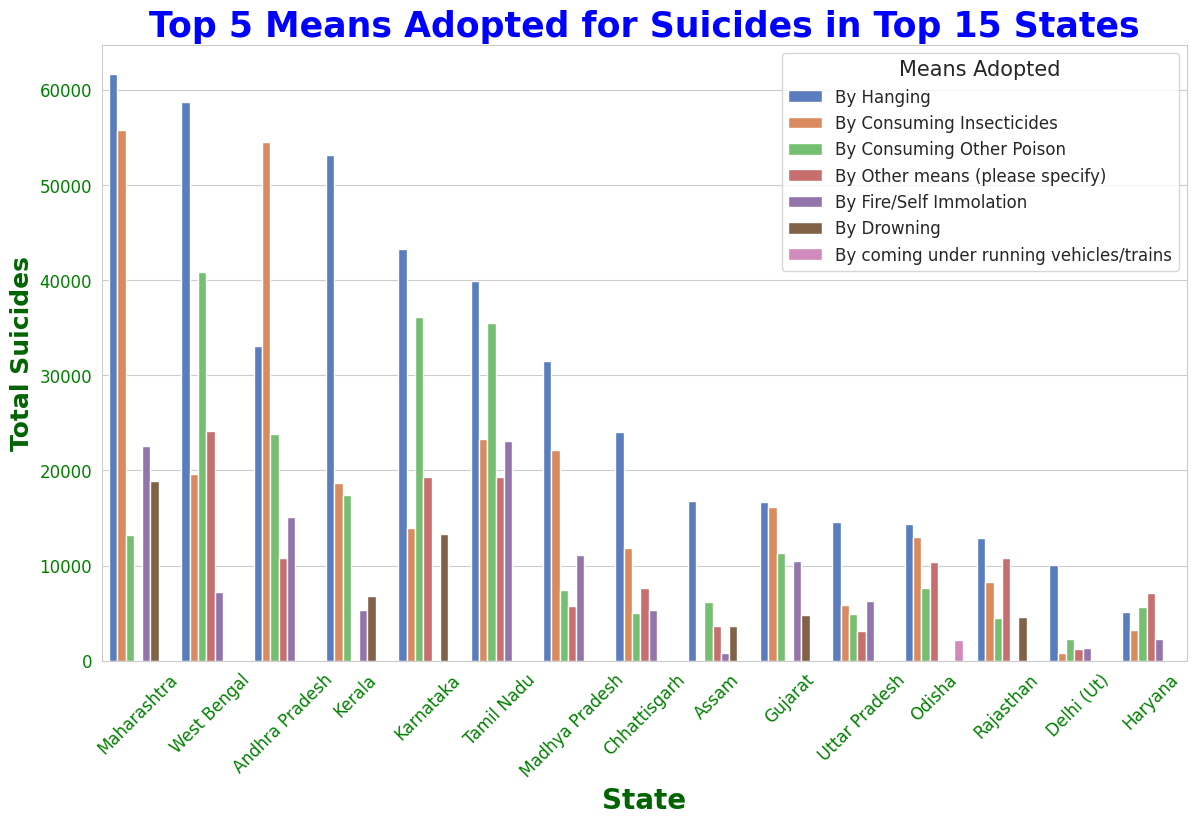

In [ ]:
# Filter data for 'Means_adopted'
means_data = top_15_data[top_15_data['Type_code'] == 'Means_adopted']

# Aggregate and get top 5 means adopted for each state
top_5_means = means_data.groupby(['State', 'Type'])['Total'].sum().reset_index()
top_5_means = top_5_means.groupby('State').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
top_5_means = top_5_means.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=top_5_means, x='State', y='Total', hue='Type', palette='muted')
plt.title('Top 5 Means Adopted for Suicides in Top 15 States', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('State', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green', rotation=45)
plt.yticks(fontsize=12, color='green')
plt.legend(title='Means Adopted', title_fontsize='15', fontsize='12')
plt.show()


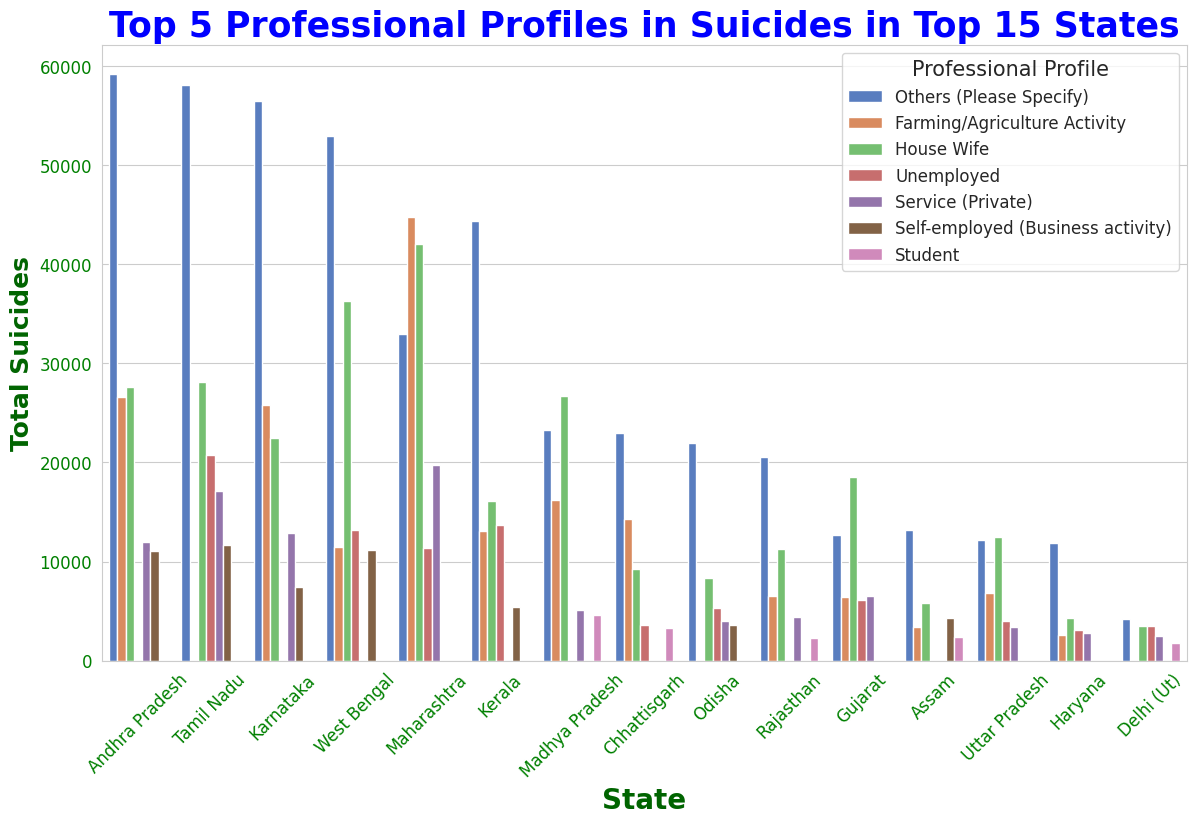

In [ ]:
# Filter data for 'Professional_Profile'
profile_data = top_15_data[top_15_data['Type_code'] == 'Professional_Profile']

# Aggregate and get top 5 professional profiles for each state
top_5_profiles = profile_data.groupby(['State', 'Type'])['Total'].sum().reset_index()
top_5_profiles = top_5_profiles.groupby('State').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
top_5_profiles = top_5_profiles.sort_values(by='Total', ascending=False)

sns.set_style("whitegrid")
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=top_5_profiles, x='State', y='Total', hue='Type', palette='muted')
plt.title('Top 5 Professional Profiles in Suicides in Top 15 States', fontsize=25, color='blue', fontweight='bold')
plt.xlabel('State', fontsize=20, color='darkgreen', fontweight='bold')
plt.ylabel('Total Suicides', fontsize=18, color='darkgreen', fontweight='bold')
plt.xticks(fontsize=12, color='green', rotation=45)
plt.yticks(fontsize=12, color='green')
plt.legend(title='Professional Profile', title_fontsize='15', fontsize='12')
plt.show()


# Performing Linear regression Model to Predict the Suicides cases for next 5 years.

In [ ]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression

# by year
total_sum = dfs.groupby('Year')['Total'].sum()

# Create features (years) and target (suicides)
X = total_sum.index.values.reshape(-1, 1)  # Years
y = total_sum.values  # Suicides

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting suicide rates for the next 5 years
future_years = np.arange(X[-1] + 1, X[-1] + 6).reshape(-1, 1)  # Next 5 years
future_suicides = model.predict(future_years)

# Print the predicted suicide rates for the next 5 years
print("Predicted Suicide Rates for the Next 5 Years:")
for year, suicides in zip(future_years.flatten(), future_suicides):
    print(f"Year {int(year)}: Predicted Suicides {int(suicides)}")

Predicted Suicide Rates for the Next 5 Years:
Year 2013: Predicted Suicides 407866
Year 2014: Predicted Suicides 415023
Year 2015: Predicted Suicides 422180
Year 2016: Predicted Suicides 429337
Year 2017: Predicted Suicides 436494


<ipython-input-50-1a960ea2eb80>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_years = np.arange(X[-1] + 1, X[-1] + 6).reshape(-1, 1)  # Next 5 years


<ipython-input-87-34d086b2b51d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(X[0], future_years[-1] + 1, 1),size=15,rotation=45,color='steelblue')


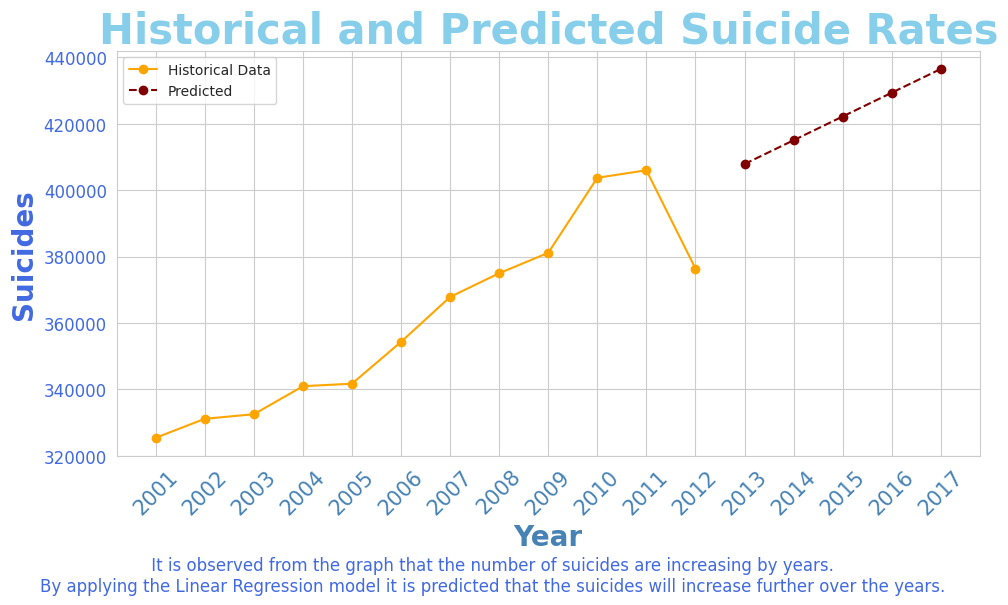

In [ ]:
# Plotting historical data
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', linestyle='-', label='Historical Data', color='orange')

# Plotting predicted suicide rates for the next 5 years
plt.plot(future_years, future_suicides, marker='o', linestyle='--', label='Predicted', color='maroon')

plt.title('Historical and Predicted Suicide Rates',size=30,color='skyblue',fontweight='bold')
plt.xlabel('Year',size=20,color='steelblue',fontweight='bold')
plt.ylabel('Suicides',size=20,color='royalblue',fontweight='bold')
plt.yticks(size=12,color='royalblue')
plt.xticks(np.arange(X[0], future_years[-1] + 1, 1),size=15,rotation=45,color='steelblue')
plt.legend()
plt.grid(True)
plt.tight_layout()

description = (
    ' It is observed from the graph that the number of suicides are increasing by years.  \n'
    'By applying the Linear Regression model it is predicted that the suicides will increase further over the years. '

    )

plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=12, color='royalblue')
plt.subplots_adjust(bottom=0.23)

plt.show()